<a href="https://colab.research.google.com/github/TigistW/XAI_Loan_Approval/blob/main/XAI_loan_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Definition**

#### **1. Business/Research Problem**
The goal is to predict **Loan Approval** based on various socio-economic, health, and demographic indicators.

This problem is a **classification task**, where we aim to predict a binary target variable.

---

#### **2. Objective**
Build a machine learning model to:
1. **Accurately classify approval** based on the provided features.
2. **Identify important factors** influencing loan approval.

---

#### **3. Challenges**
- **Missing Data**: Three features have missing values, requiring imputation or handling.
- **Feature Scaling**: Numerical features vary greatly in scale and require normalization.
- **Feature Selection**: Some features may not contribute significantly to the target variable.
- **Imbalanced Data**: If the dataset is skewed toward certain ranges of life expectancy, it may affect model performance.

---

#### **4. Success Criteria**
To evaluate the success of the model in a classification problem, we can use the following metrics:

1. **Accuracy**: The proportion of correctly predicted instances to the total instances.
2. **Precision**: The proportion of positive predictions that are actually correct.
3. **Recall (Sensitivity)**: The proportion of actual positives that are correctly identified.
4. **F1 Score**: The harmonic mean of precision and recall, providing a balance between the two.
5. **Confusion Matrix**: Displays the counts of true positive, true negative, false positive, and false negative predictions.

A successful model should:
- Maximize accuracy, precision, recall, and F1 score.
- Display a favorable confusion matrix, with few false positives and false negatives.


# **Data Collection**

#### **Data Source**
The dataset provided is a tabular dataset containing socio-economic, and demographic features for various ages.

---

#### **Relevance of Data**
The dataset is relevant to the problem domain as it includes features that directly or indirectly influence loan approval, such as:

---

#### **Data Quality**
The dataset requires:
1. **Handling Missing Values**:
   - Some features have missing values, which need to be imputed.
2. **Scaling**:
   - Numerical features vary significantly in scale, requiring normalization.


# **Reading Dataset**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the CSV file
train_csv_file_path = "/content/cs-training.csv"
test_csv_file_path = "/content/cs-test.csv"
data = pd.read_csv(train_csv_file_path)
test = pd.read_csv(test_csv_file_path)

In [3]:
# Inspect the dataset
print(data.head())
print(test.head())


   Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0           1                 1                              0.766127   45   
1           2                 0                              0.957151   40   
2           3                 0                              0.658180   38   
3           4                 0                              0.233810   30   
4           5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                   

# **Data Exploration and Preparation**

### **Exploratory Data Analysis (EDA)**

In [4]:
print("\nDataset Info:")
print(data.info())

print("\Test Info:")
print(test.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null

In [5]:
# Statistical summary
print(data.describe())
print(test.describe())

          Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
count  150000.000000     150000.000000                         150000.000000   
mean    75000.500000          0.066840                              6.048438   
std     43301.414527          0.249746                            249.755371   
min         1.000000          0.000000                              0.000000   
25%     37500.750000          0.000000                              0.029867   
50%     75000.500000          0.000000                              0.154181   
75%    112500.250000          0.000000                              0.559046   
max    150000.000000          1.000000                          50708.000000   

                 age  NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  \
count  150000.000000                         150000.000000  150000.000000   
mean       52.295207                              0.421033     353.005076   
std        14.771866                            

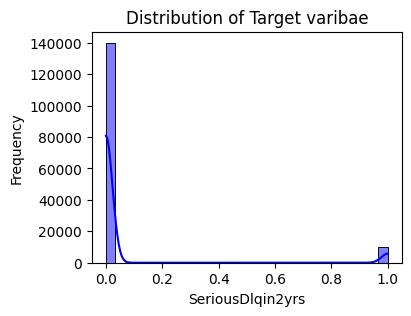

In [6]:
# Target variable distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4,3))
sns.histplot(data['SeriousDlqin2yrs'], kde=True, color='blue', bins=30)
plt.title("Distribution of Target varibae")
plt.xlabel("SeriousDlqin2yrs")
plt.ylabel("Frequency")
plt.show()


### **Data Cleaning**


In [7]:
# See missing values in the data
print("Missing Values Before Handling:")
print(data.isnull().sum())
print(test.isnull().sum())

Missing Values Before Handling:
Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64
Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate    

In [8]:
# Handling numerical values with missing values
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Handling categorical values with missing values
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

Index([], dtype='object')


In [9]:
data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [10]:
# Handling numerical values with missing values
numeric_columns = test.select_dtypes(include=['float64', 'int64']).columns
test[numeric_columns] = test[numeric_columns].fillna(test[numeric_columns].mean())

# Handling categorical values with missing values
categorical_columns = test.select_dtypes(include=['object']).columns
print(categorical_columns)
for col in categorical_columns:
    test[col] = test[col].fillna(test[col].mode()[0])

Index([], dtype='object')


In [11]:
test.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [12]:
# See missing values in the data after handling them
print("Missing Values After Handling:")
print(data.isnull().sum())
print(len(data))

Missing Values After Handling:
Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64
150000


In [13]:
# See missing values in the data after handling them
print("Missing Values After Handling:")
print(test.isnull().sum())
print(len(test))

Missing Values After Handling:
Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                           0
dtype: int64
101503


In [14]:
data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [15]:
test.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [16]:
# Remove duplicates if any
print(f"Data before removing duplicates: {data.shape}")
data = data.drop_duplicates()
print(f"Data after removing duplicates: {data.shape}")

Data before removing duplicates: (150000, 12)
Data after removing duplicates: (150000, 12)


### **Feature Engineering**

#### **Encoding Categorical Variables**

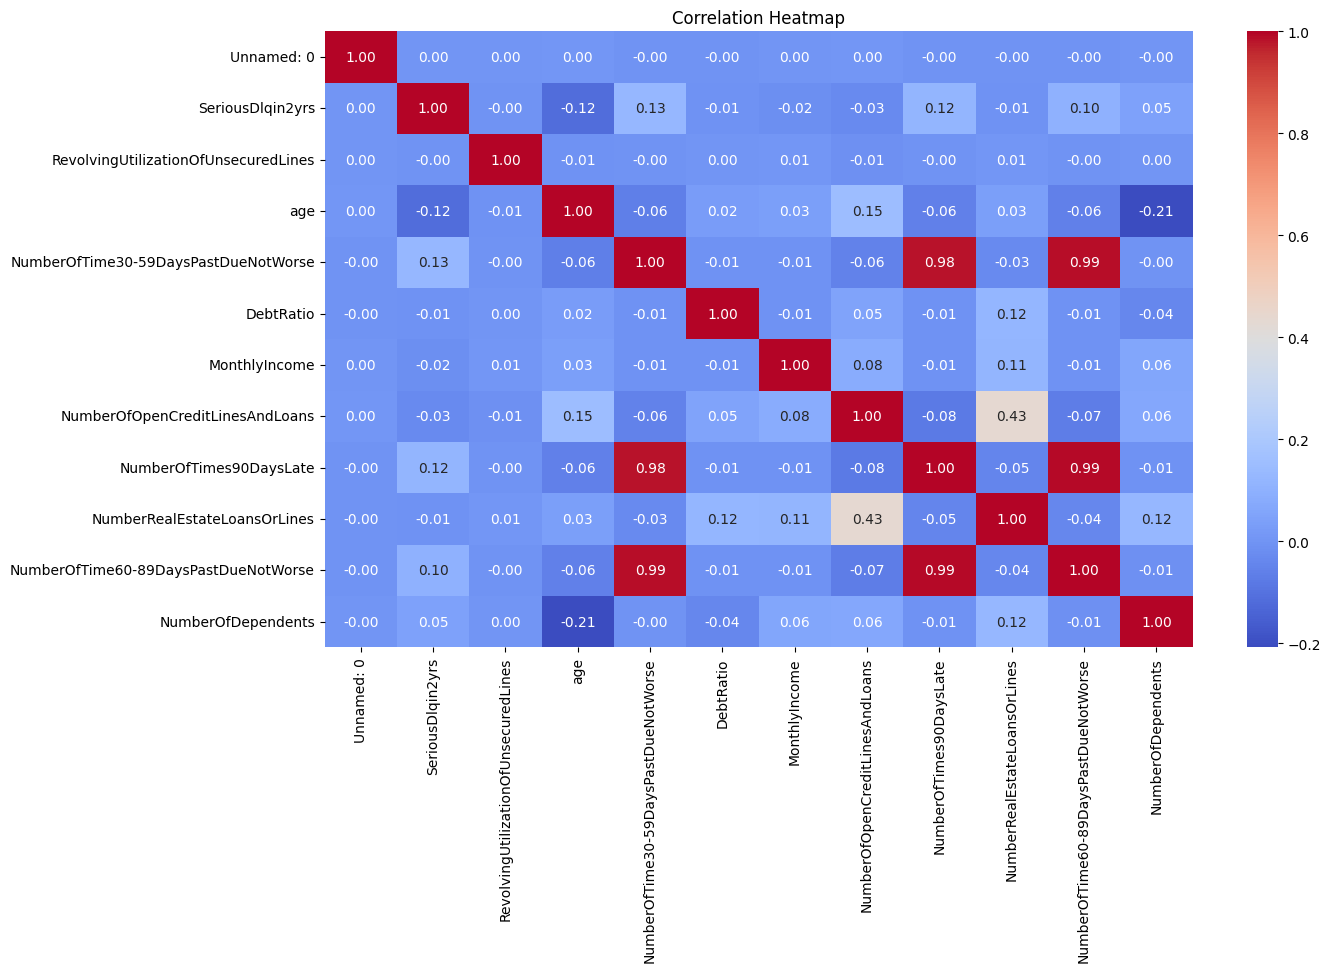

In [17]:
# Correlation heatmap
plt.figure(figsize=(14, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [18]:
# Drop a single column
data = data.drop(columns=['Unnamed: 0'])
print(data)

        SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0                      1                              0.766127   45   
1                      0                              0.957151   40   
2                      0                              0.658180   38   
3                      0                              0.233810   30   
4                      0                              0.907239   49   
...                  ...                                   ...  ...   
149995                 0                              0.040674   74   
149996                 0                              0.299745   44   
149997                 0                              0.246044   58   
149998                 0                              0.000000   30   
149999                 0                              0.850283   64   

        NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  MonthlyIncome  \
0                                          2     0.802982    9120.00000

#### **Data Splitting**

In [19]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop(columns=['SeriousDlqin2yrs'])
y = data['SeriousDlqin2yrs']

In [20]:
test = test.drop(columns = ['SeriousDlqin2yrs'])

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_test = test
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 120000
Validation set size: 30000
Test set size: 101503


# **Some Useful Functions**

In [22]:
import pickle

def save_model(model, filename):
    # Save the trained model to a file.

    with open(filename, "wb") as model_file:
        pickle.dump(model, model_file)
    print(f"Model saved successfully to {filename}.")


In [23]:
def load_model(filename):

    # Load a model from a file.

    with open(filename, "rb") as model_file:
        model = pickle.load(model_file)
    print(f"Model loaded successfully from {filename}.")
    return model


In [24]:
def predict_with_model(model, X_data):
    # Use a trained model to make predictions on given data.
    predictions = model.predict(X_data)
    return predictions


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(model, X_data, y_true):

    # Make predictions
    predictions = model.predict(X_data)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, predictions)
    precision = precision_score(y_true, predictions, average='weighted')
    recall = recall_score(y_true, predictions, average='weighted')
    f1 = f1_score(y_true, predictions, average='weighted')
    conf_matrix = confusion_matrix(y_true, predictions)

    # Print the metrics
    print("Classification Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)

    # Return the metrics as a dictionary
    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix
    }


# **Algorithm Selection**

Based on the problem definition and data characteristics, this is a regression problem (predicting a continuous target: Life Expectancy). The following algorithms are suitable for regression tasks:

#### **Algorithms used:**

**Logistic Models:**

---

*Logistics Regression*: A baseline model to establish initial performance.
Regression: Handle multicollinearity and feature selection.

**Tree-Based Models:**

---

*Random Forest Regressor*: Handles non-linearity and captures interactions between features.

*Gradient Boosting Regressor*: Builds a strong model by iteratively improving weak learners.

**Computational Cost and Interpretability**

*Logistic Regression:* Low computational cost, high interpretability.

*Random Forest*: Medium computational cost, limited interpretability.

*Gradient Boosting:* Higher computational cost, excellent performance in many cases.

# **Model Development and Training**

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import pickle

#### **Linear Regression**

In [27]:
# Train the Linear Regression model
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

# Save the trained model
save_model(logistic_reg, "logistic_regression_model.pkl")


Model saved successfully to logistic_regression_model.pkl.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
# Load the saved model
loaded_log_regression_model = load_model("logistic_regression_model.pkl")

print("\nEvaluate the model on the validation set")
val_metrics_linear_regression = evaluate_model(loaded_log_regression_model, X_val, y_val)


Model loaded successfully from logistic_regression_model.pkl.

Evaluate the model on the validation set
Classification Evaluation Metrics:
Accuracy: 0.9348
Precision: 0.9078
Recall: 0.9348
F1 Score: 0.9052
Confusion Matrix:
[[28015    29]
 [ 1926    30]]


#### **Random Forest Regressor**

In [29]:
# Initialize the Random Forest Regressor
rf_model = RandomForestClassifier(random_state=42, n_estimators=500)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Save the trained model
save_model(rf_model, "random_forest_model.pkl")


Model saved successfully to random_forest_model.pkl.


In [30]:
# Load the saved model
loaded_rf_model = load_model("random_forest_model.pkl")

print("Evaluate the model on the validation set")
val_metrics_rf = evaluate_model(loaded_rf_model, X_val, y_val)

Model loaded successfully from random_forest_model.pkl.
Evaluate the model on the validation set
Classification Evaluation Metrics:
Accuracy: 0.9368
Precision: 0.9203
Recall: 0.9368
F1 Score: 0.9231
Confusion Matrix:
[[27708   336]
 [ 1559   397]]


#### **Hyperparameter Tuning for Random Forest Classifier**


We’ll use GridSearchCV to find the best combination of hyperparameters for the Random Forest Regressor. The key hyperparameters to tune include:

**n_estimators**: Number of trees in the forest.

**max_depth**: Maximum depth of each tree.

**min_samples_split**: Minimum number of samples required to split a node.

**min_samples_leaf**: Minimum number of samples required to be a leaf node.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 125],
    'max_depth': [10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

# Initialize the Random Forest Classifier
rf_tuned_model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_tuned_model,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='accuracy',  # Use accuracy for classification
    n_jobs=-1,
    verbose=2
)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Display the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy (GridSearch):", grid_search.best_score_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [ ]:
# Retrieve the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Save the tuned model
save_model(best_rf_model, "tuned_random_forest_model.pkl")

In [ ]:
loaded_best_rf_model = load_model("tuned_random_forest_model.pkl")

print("\nEvaluate the tuned model on the validation set")
val_metrics_best_rf = evaluate_model(loaded_best_rf_model, X_val, y_val)

#### **Gradient Boost**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Regressor
gbr_model = GradientBoostingClassifier(random_state=42, n_estimators=100)

# Train the model
gbr_model.fit(X_train, y_train)

# Save the trained model
save_model(gbr_model, "gradient_boosting_model.pkl")


In [ ]:
# Load the saved model
loaded_gbr_model = load_model("gradient_boosting_model.pkl")

print("\nEvaluate the model on the validation set")
val_metrics_gbr = evaluate_model(loaded_gbr_model, X_val, y_val)


#### **Hyperparameter Tuning for Gradient Boosting Classifier**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Gradient Boosting
param_grid_gbr = {
    'n_estimators': [50, 125],
    'max_depth': [5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Initialize GridSearchCV for Gradient Boosting
grid_search_gbr = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid_gbr,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Perform the grid search
grid_search_gbr.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters for Gradient Boosting:", grid_search_gbr.best_params_)
print("Best Negative MSE (Gradient Boosting):", grid_search_gbr.best_score_)

In [ ]:
# Evaluate the tuned Gradient Boosting model
best_gbr_model = grid_search_gbr.best_estimator_

save_model(best_gbr_model, "tuned_gradient_boosting_model.pkl")

print("\nEvaluate the model on the validation set")
val_metrics_best_gbr = evaluate_model(best_gbr_model, X_val, y_val)


#### **Feature Importance**

In [ ]:
# Feature Importance for Random Forest
rf_importances = best_rf_model.feature_importances_
features = X_train.columns

# Plot feature importances
plt.figure(figsize=(5, 3))
plt.barh(features, rf_importances, color='skyblue')
plt.title("Feature Importance for Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


In [ ]:
# Feature Importance for Gradient Boosting
gbr_importances = best_gbr_model.feature_importances_

# Plot feature importances
plt.figure(figsize=(5, 3))
plt.barh(features, gbr_importances, color='orange')
plt.title("Feature Importance for Gradient Boosting")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


#Explainability

In [ ]:
!pip install lime

In [ ]:
import numpy as np
import pandas as pd
import shap
import lime
import lime.lime_tabular
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Initialize models
# loaded_log_regression_model
# loaded_rf_model
# loaded_gbr_model

# ========================= SHAP (Global Feature Importance) =========================
# explainer_log_reg = shap.Explainer(loaded_log_regression_model, X_train)
# shap_values_log_reg = explainer_log_reg(X_test)

explainer_rf = shap.Explainer(loaded_rf_model, X_train[:100])
shap_values_rf = explainer_rf(X_test)

explainer_gb = shap.Explainer(loaded_gbr_model, X_train)
shap_values_gb = explainer_gb(X_test)

# SHAP Summary Plots
print("SHAP Feature Importance for Logistic Regression:")
shap.summary_plot(shap_values_log_reg, X_test, feature_names=X.columns)

print("SHAP Feature Importance for Random Forest:")
shap.summary_plot(shap_values_rf, X_test, feature_names=X.columns)

print("SHAP Feature Importance for Gradient Boosting:")
shap.summary_plot(shap_values_gb, X_test, feature_names=X.columns)


In [ ]:
import numpy as np
import lime
import lime.lime_tabular

# ========================= LIME (Local Explanation) =========================
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X.columns,
    class_names=['Class 0', 'Class 1'],
    discretize_continuous=True
)

# Pick a random test instance
i = np.random.randint(0, len(X_test))
X_sample = X_test.iloc[i].values.reshape(1, -1)

# ================= LIME for Logistic Regression =================
lime_exp_log_reg = lime_explainer.explain_instance(
    X_sample[0], loaded_log_regression_model.predict_proba
)
print("LIME Explanation for Logistic Regression:")
lime_exp_log_reg.show_in_notebook()

# ================= LIME for Random Forest =================
lime_exp_rf = lime_explainer.explain_instance(
    X_sample[0], loaded_rf_model.predict_proba
)
print("LIME Explanation for Random Forest:")
lime_exp_rf.show_in_notebook()

# ================= LIME for Gradient Boosting =================
lime_exp_gb = lime_explainer.explain_instance(
    X_sample[0], loaded_gbr_model.predict_proba
)
print("LIME Explanation for Gradient Boosting:")
lime_exp_gb.show_in_notebook()
